# Explorative data analysis

In [203]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [204]:
def count_features(values, keys):
    """
    tbd.
    """
    summed_values = values.sum(axis=0)
    zipped_dictionary = zip(summed_values, keys)
    sorted_zipped_dictionary = sorted(zipped_dictionary, reverse=True)
    return sorted_zipped_dictionary

In [205]:
def build_vocabulary(df, feature_size, n_gram_size):
    """
    tbd.
    """
    corpus = df['processed_text'].values
    vectorizer = CountVectorizer(max_features=feature_size, ngram_range=(n_gram_size, n_gram_size))
    feature_matrix = vectorizer.fit_transform(corpus)
    feature_vocabulary = vectorizer.get_feature_names() # feature order
    return feature_vocabulary, feature_matrix.toarray()

In [206]:
def ngram_statistics(df, select_class, feature_size, n_gram_size):
    """
    tbd.
    """
    selected_df = df.loc[df['class'] == select_class]
    vocabulary, matrix = build_vocabulary(selected_df, feature_size, n_gram_size)
    statistics = count_features(matrix, vocabulary)
    return statistics

In [207]:
def split_tuples(list_1, list_2):
    """
    tbd.
    """
    dict_1 = {}
    for detail in list_1:
        tmp_dict = {detail[1]: detail[0]}
        dict_1.update(tmp_dict)
    
    dict_2 = {}
    for detail in list_2:
        tmp_dict = {detail[1]: detail[0]}
        dict_2.update(tmp_dict)
    
    
    return dict_1, dict_2

In [208]:
def add_dicts(dict_1, dict_2):
    """
    tbd.
    """
    summed_dict = dict_2
    for key in dict_1:
        if key in dict_2:
            summed_dict[key] = dict_2[key] + dict_1[key]
        else:
            summed_dict.update({key: dict_1[key]}) 
    
    return summed_dict

In [209]:
def create_df_from_dict(from_dict, add_class):
    """
    tbd.
    """
    import_dict = {'key': list(from_dict.keys()), 'value': list(from_dict.values())}
    df = pd.DataFrame.from_dict(import_dict)
    df['class'] = add_class
    return df

In [210]:
def get_merged_vocabulary(df, feature_size, n_gram_size):
    """
    tbd.
    """
    # create statistics
    n_gram_0 = ngram_statistics(df, 0, feature_size, n_gram_size)
    n_gram_1 = ngram_statistics(df, 1, feature_size, n_gram_size)
    
    # create dicts from tuples
    dict_0, dict_1 = split_tuples(n_gram_0, n_gram_1)
    
    # create dataframes
    df_0 = create_df_from_dict(dict_0, 0)
    df_1 = create_df_from_dict(dict_1, 1)
    
    # merge dataframes
    df = pd.concat([df_0, df_1], axis=0)
    df.reset_index(drop=True, inplace=True)
    
    return df

## Determine 20 most used 1-gram per class and make a plot

In [211]:
# import corpus data
corpus = pd.read_csv('{}/{}'.format('data', 'corpus-44898.csv'))
corpus.head(2)

,class,processed_text
0,0,nigerian presid say cannot afford return delta...
1,0,least four kill british motorway crash polic l...


In [212]:
results = get_merged_vocabulary(corpus, 20, 1)

## Plot

In [213]:
def create_plot(df, x, y, group, output):
    """
    tbd.
    """
    %matplotlib inline
    sns.set_style(style='whitegrid')
    g = sns.catplot(
        data=df, kind='bar',
        x=x, y=y, hue=group, 
        palette='dark', alpha=.7, height=8.27, aspect=11.7/8.27
    )
    g.set_xticklabels(rotation=90)
    g.savefig(output)

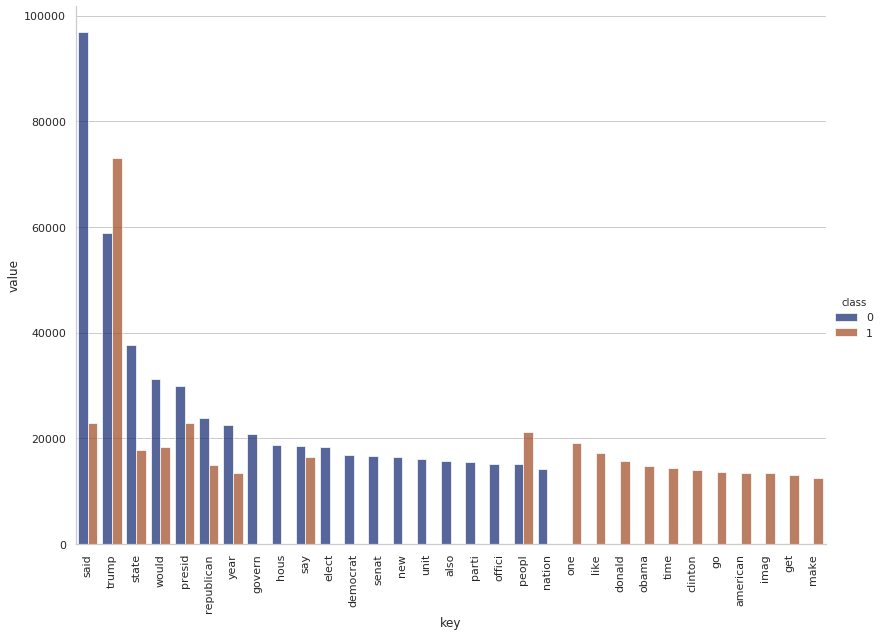

In [214]:
create_plot(results, 'key', 'value', 'class', 'output.png')